
### Objective 1: Maximize Efficiency

For Riders: Minimize Waiting Time

1. **Experiment Setup:**
    - Mock data for ride requests including request time, pickup time, and drop-off time.
    - Calculate waiting time as the difference between request time and pickup time.

/var/folders/68/hxhfgy_11gbdd627l4d_3_br0000gn/T/ipykernel_85988/1496510679.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  request_times = pd.date_range(start="2024-01-01", periods=num_rides, freq='T')


Average waiting time for riders: 4.90 minutes


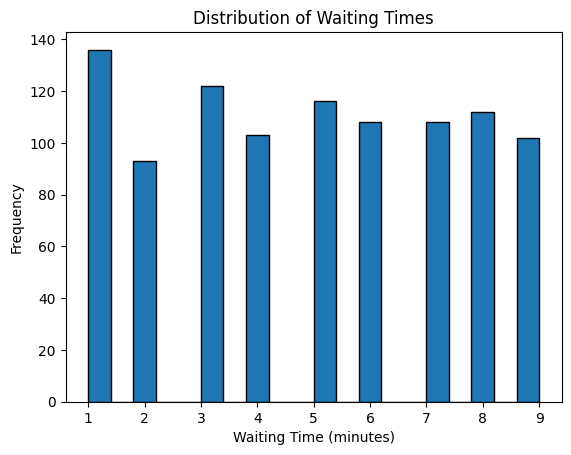

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mock data for ride requests
np.random.seed(42)
num_rides = 1000
request_times = pd.date_range(start="2024-01-01", periods=num_rides, freq='T')
pickup_times = request_times + pd.to_timedelta(np.random.randint(1, 10, size=num_rides), unit='m')
dropoff_times = pickup_times + pd.to_timedelta(np.random.randint(5, 30, size=num_rides), unit='m')

# Create DataFrame
rides = pd.DataFrame({
    'request_time': request_times,
    'pickup_time': pickup_times,
    'dropoff_time': dropoff_times
})

# Calculate waiting time
rides['waiting_time'] = (rides['pickup_time'] - rides['request_time']).dt.total_seconds() / 60.0

# Calculate average waiting time
average_waiting_time = rides['waiting_time'].mean()

print(f'Average waiting time for riders: {average_waiting_time:.2f} minutes')

# Plot waiting time distribution
plt.hist(rides['waiting_time'], bins=20, edgecolor='black')
plt.title('Distribution of Waiting Times')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.show()

#### For Drivers: Minimize Idle Time and Maximize Utilization Rate

1. **Experiment Setup:**
    - Mock data for driver activity including idle time and ride time.
    - Calculate utilization rate as the proportion of time spent with a passenger.

Average utilization rate for drivers: 72.88%


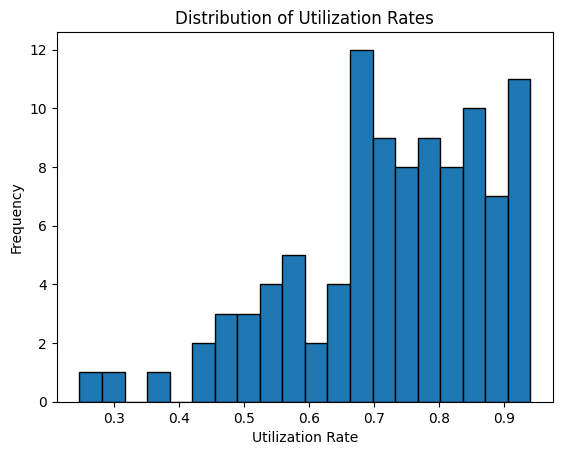

In [2]:
# Mock data for driver activity
num_drivers = 100
driver_ids = np.arange(num_drivers)
ride_times = np.random.randint(30, 300, size=num_drivers)  # Total ride time in minutes
idle_times = np.random.randint(10, 100, size=num_drivers)  # Total idle time in minutes

# Create DataFrame
drivers = pd.DataFrame({
    'driver_id': driver_ids,
    'ride_time': ride_times,
    'idle_time': idle_times
})

# Calculate utilization rate
drivers['utilization_rate'] = drivers['ride_time'] / (drivers['ride_time'] + drivers['idle_time'])

# Calculate average utilization rate
average_utilization_rate = drivers['utilization_rate'].mean()

print(f'Average utilization rate for drivers: {average_utilization_rate:.2%}')

# Plot utilization rate distribution
plt.hist(drivers['utilization_rate'], bins=20, edgecolor='black')
plt.title('Distribution of Utilization Rates')
plt.xlabel('Utilization Rate')
plt.ylabel('Frequency')
plt.show()



### Objective 2: Optimize Pricing

#### Dynamic Pricing to Balance Supply and Demand

1. **Experiment Setup:**
    - Mock data for ride requests, supply availability, and pricing.
    - Adjust prices based on demand and supply conditions.


/var/folders/68/hxhfgy_11gbdd627l4d_3_br0000gn/T/ipykernel_85988/2086716393.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_periods = pd.date_range(start="2024-01-01", periods=24, freq='H')


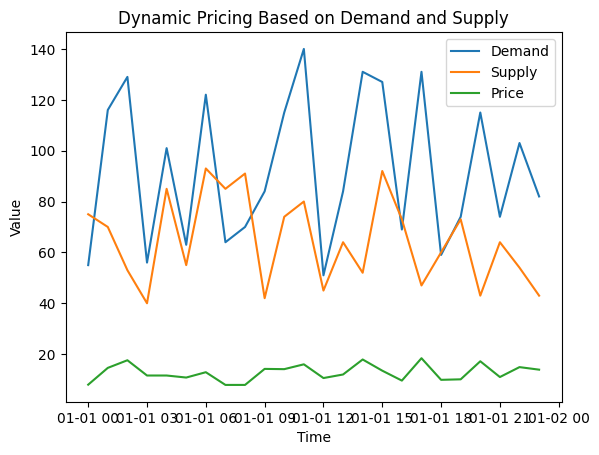

Average price: $12.76


In [3]:
# Mock data for demand and supply
time_periods = pd.date_range(start="2024-01-01", periods=24, freq='H')
demand = np.random.randint(50, 150, size=24)  # Number of ride requests per hour
supply = np.random.randint(40, 100, size=24)  # Number of available drivers per hour

# Create DataFrame
pricing_data = pd.DataFrame({
    'time_period': time_periods,
    'demand': demand,
    'supply': supply
})

# Dynamic pricing model
base_price = 10  # Base price in dollars
pricing_data['price'] = base_price + (pricing_data['demand'] - pricing_data['supply']) * 0.1

# Ensure prices are within reasonable bounds
pricing_data['price'] = pricing_data['price'].clip(lower=5, upper=50)

# Plot demand, supply, and pricing
plt.plot(pricing_data['time_period'], pricing_data['demand'], label='Demand')
plt.plot(pricing_data['time_period'], pricing_data['supply'], label='Supply')
plt.plot(pricing_data['time_period'], pricing_data['price'], label='Price')
plt.legend()
plt.title('Dynamic Pricing Based on Demand and Supply')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Calculate average price
average_price = pricing_data['price'].mean()

print(f'Average price: ${average_price:.2f}')

#### Preventing the System from Entering the "Danger Zone"

1. **Experiment Setup:**
    - Define conditions for the "danger zone" (e.g., demand exceeds supply by a large margin, leading to long wait times).
    - Monitor and adjust pricing to avoid these conditions.

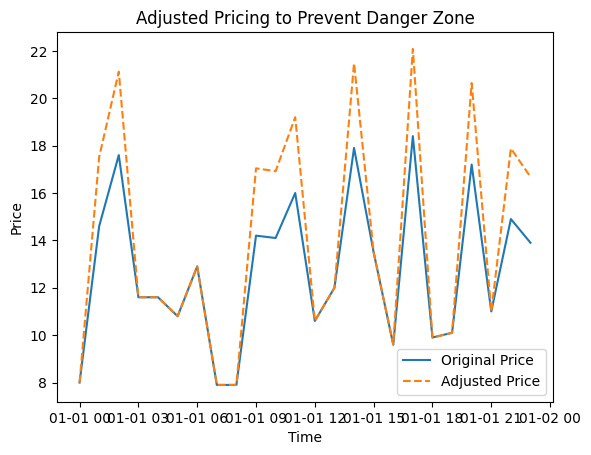

Average adjusted price: $14.08


In [4]:
# Define danger zone condition
pricing_data['danger_zone'] = pricing_data['demand'] > pricing_data['supply'] * 1.5

# Adjust pricing to avoid danger zone
pricing_data['adjusted_price'] = pricing_data['price']
pricing_data.loc[pricing_data['danger_zone'], 'adjusted_price'] *= 1.2  # Increase price by 20% in danger zone

# Plot adjusted pricing
plt.plot(pricing_data['time_period'], pricing_data['price'], label='Original Price')
plt.plot(pricing_data['time_period'], pricing_data['adjusted_price'], label='Adjusted Price', linestyle='--')
plt.legend()
plt.title('Adjusted Pricing to Prevent Danger Zone')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Calculate average adjusted price
average_adjusted_price = pricing_data['adjusted_price'].mean()

print(f'Average adjusted price: ${average_adjusted_price:.2f}')